# Projeto Rede Metro SP
Rede de transporte metropolitano SP - O projeto do módulo 2 consiste em modelar a rede de transporte metropolitano de SP como um grafo!

<img src="img/Mapa.png" style="width:350px;" >

In [2]:
import numpy  as np
import pandas as pd 
from geopy.distance import geodesic
import plotly_express as px
from numpy import genfromtxt
import json
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path =path = "datasets\Projeto_linhas.xlsx"
df = pd.read_excel(path, sheet_name='Linhas')
df.shape
#df[df['linha']=='Corredor - A2']
#df[df['linha']==linha]['Tempo Medio']
df.dtypes

ordem            int64
Tempo Medio      int64
estacao         object
linha           object
tipo            object
lat            float64
long           float64
dtype: object

In [4]:
G = nx.DiGraph()

In [5]:
import matplotlib.pyplot as plt

tucuruvi
paradainglesa
jardimsaopaulo-ayrtonsenna
santana
carandiru
portuguesa-tiete
armênia
tiradentes
luz
saobento
se
japao-liberdade
saojoaquim
vergueiro
paraiso
anarosa
vilamariana
santacruz
pracadaarvore
saude
saojudas
conceicao
vilamadalena
santuarion.sra.defatima-sumare
clinicas
consolacao
trianon-masp
metrôbrigadeiro
paraiso
anarosa
chacaraklabin
santos-imigrantes
altodoipiranga
estacaosacoma
tamanduatei
palmeiras–barrafunda
marechaldeodoro
republica
estacaoanhangabau
se
pedroii
bras
bresser-mooca
belem
tatuape
carrao
penha
vilamatilde
guilhermina-esperanca
patriarca
arturalvim
luz
republica
higienópolis-mackenzie
paulista
oscarfreire
fradiquecoutinho
farialima
pinheiros
butanta
capaoredondo
campolimpo
viladasbelezas
giovannigronchi
santoamaro
largotreze
adolfopinheiro
altodaboavista
borbagato
brooklin
campobelo
eucaliptos
moema
aacd-servidor
hospitalsaopaulo
santacruz
estacaodaluz
palmeiras-barrafunda
estacaoaguabranca
lapa-linha7
estacaopiqueri
pirituba
estacaovilaclarice
jar

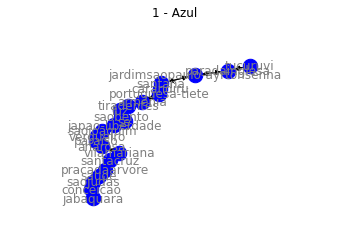

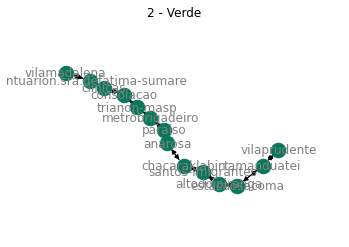

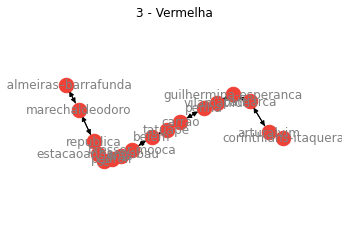

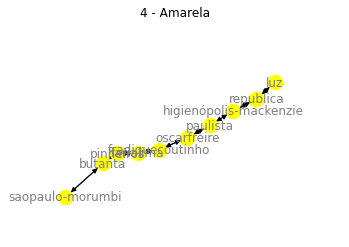

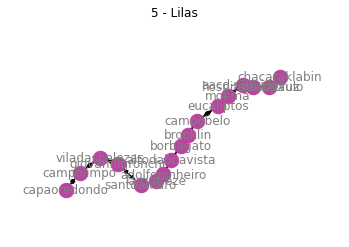

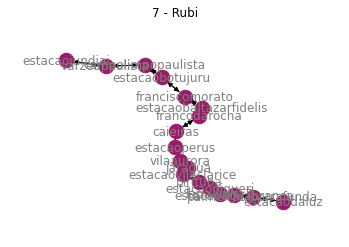

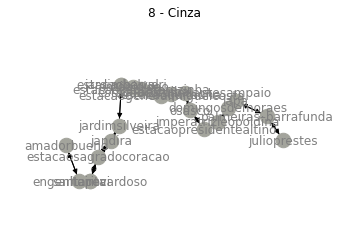

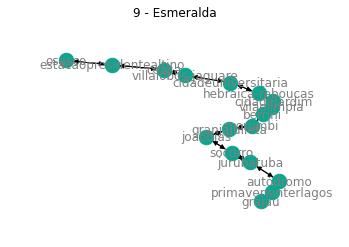

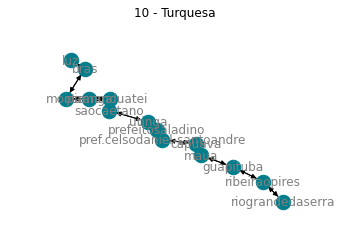

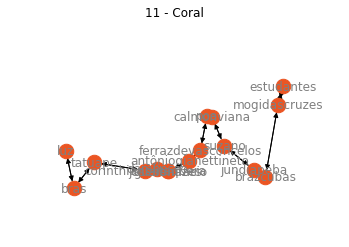

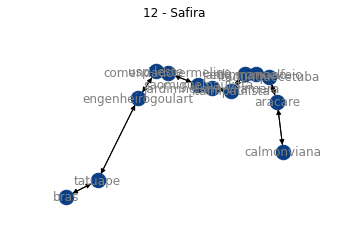

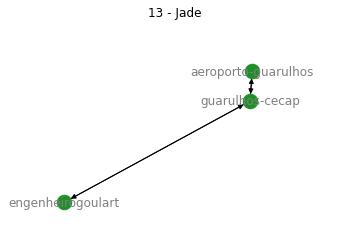

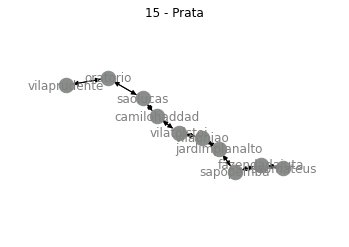

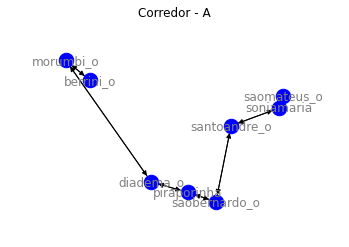

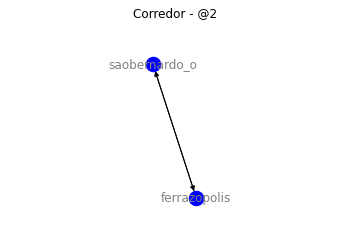

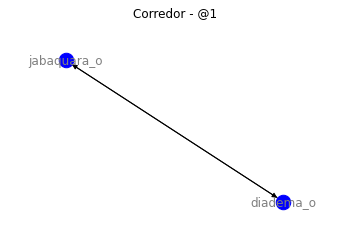

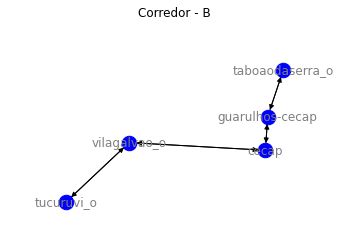

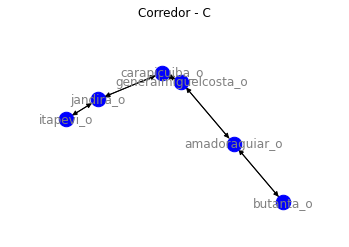

In [6]:
dic_grafos = {}
dic_grafos_pos = {}
dic_conexoes = {}

for estacao in df.values:
    G.add_node(estacao[3])
    dic_grafos_pos[estacao[3]] ={}
df['Tempo Medio'] = df['Tempo Medio'].apply(lambda x: int(x))
for linha in df['linha'].unique().tolist():
    g = nx.DiGraph()
    listEst = df[df['linha']==linha]['estacao'].unique().tolist()
    
    g.add_nodes_from(listEst)
    for cnt in range(len(listEst)-1):
        print(listEst[cnt])
        listEstW = df[(df['linha']==linha) & (df['estacao']==listEst[cnt])]['Tempo Medio']
        # print(listEstW)
        
        g.add_edge(listEst[cnt], listEst[cnt+1], weight=int(listEstW))
        g.add_edge(listEst[cnt+1], listEst[cnt], weight=int(listEstW))
    dic_grafos[linha] = g 
    
        #g.add_edge(listEst[cnt], listEst[cnt+1]) 

for linha in df['linha'].unique().tolist():
    listEst = df[df['linha']==linha]['estacao'].unique().tolist()
    df_e = df[df['linha']==linha]
    for cnt, e in df_e.iterrows():
        dic_grafos_pos[linha][e['estacao']] =  [ e['long'], e['lat']]

# print(dic_grafos['1 - Azul'])
# g = dic_grafos['1 - Azul']
# pos = dic_grafos_pos['1 - Azul']
# print(pos)
# # top = nx.bipartite.sets(g)[0]
# # pos = nx.bipartite_layout(g, top)
# nx.draw_networkx(g, pos=pos, node_color="blue", node_size=210, font_color='gray')
# # Set margins for the axes so that nodes aren't clipped
# ax = plt.gca()
# ax.margins(0.20)
# plt.axis("off")
# plt.show()
# print(dic_grafos['2 - Verde'])
# g = dic_grafos['2 - Verde']
# pos = dic_grafos_pos['2 - Verde']
# print(pos)
# # top = nx.bipartite.sets(g)[0]
# # pos = nx.bipartite_layout(g, top)
# nx.draw_networkx(g, pos=pos, node_color="green", node_size=210, font_color='gray')
# # Set margins for the axes so that nodes aren't clipped
# ax = plt.gca()
# ax.margins(0.20)
# plt.axis("off")
# plt.show()
def replace_words(s, words):
    for k, v in words.items():
        s = s.replace(k, v)
    return s

def plotLine(nomeLinha):
    colordict = {'1 - Azul': 'blue',
                 '2 - Verde':'#07785c',
                 '3 - Vermelha':'#ef4136',
                 '4 - Amarela':'yellow',
                 '5 - Lilas':'#ba43a1',
                 '7 - Rubi':'#9b1b68',
                 '8 - Cinza':'#a3a49c',
                 '9 - Esmeralda':'#0aa690',
                 '10 - Turquesa':'#027d8c',
                 '11 - Coral':'#eb5523',
                 '12 - Safira':'#0a3f85',
                 '13 - Jade':'#1f9028',
                 '15 - Prata':'#8a8e8a',
                 'Corredor - A':'blue',
                 'Corredor - @1':'blue',
                 'Corredor - @2':'blue',
                 'Corredor - B':'blue',
                 'Corredor - C':'blue'
}
    coltable = replace_words(nomeLinha,colordict)
    #print(dic_grafos[nomeLinha])
    g = dic_grafos[nomeLinha]
    pos = dic_grafos_pos[nomeLinha]
    # print(pos)
    # top = nx.bipartite.sets(g)[0]
    # pos = nx.bipartite_layout(g, top)
    #nx.draw_networkx_labels(g, label_pos=, pos=pos, rotation='vertical')
    nx.draw_networkx(g, pos=pos, node_color=coltable, node_size=210, font_color='gray',with_labels=True)
    # Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    plt.title(nomeLinha)
    ax.margins(0.20)
    plt.axis("off")
    plt.show()
    
for linha in df['linha'].unique().tolist():
    plotLine(linha)




In [8]:
metroSP = nx.DiGraph()

# compondo regioes
for g in dic_grafos.values():
    
    metroSP = nx.compose(metroSP, g)



In [9]:
dic_grafos_pos_total = {}
    # compondo regioes
for g in dic_grafos_pos.values():
    dic_grafos_pos_total.update(g)

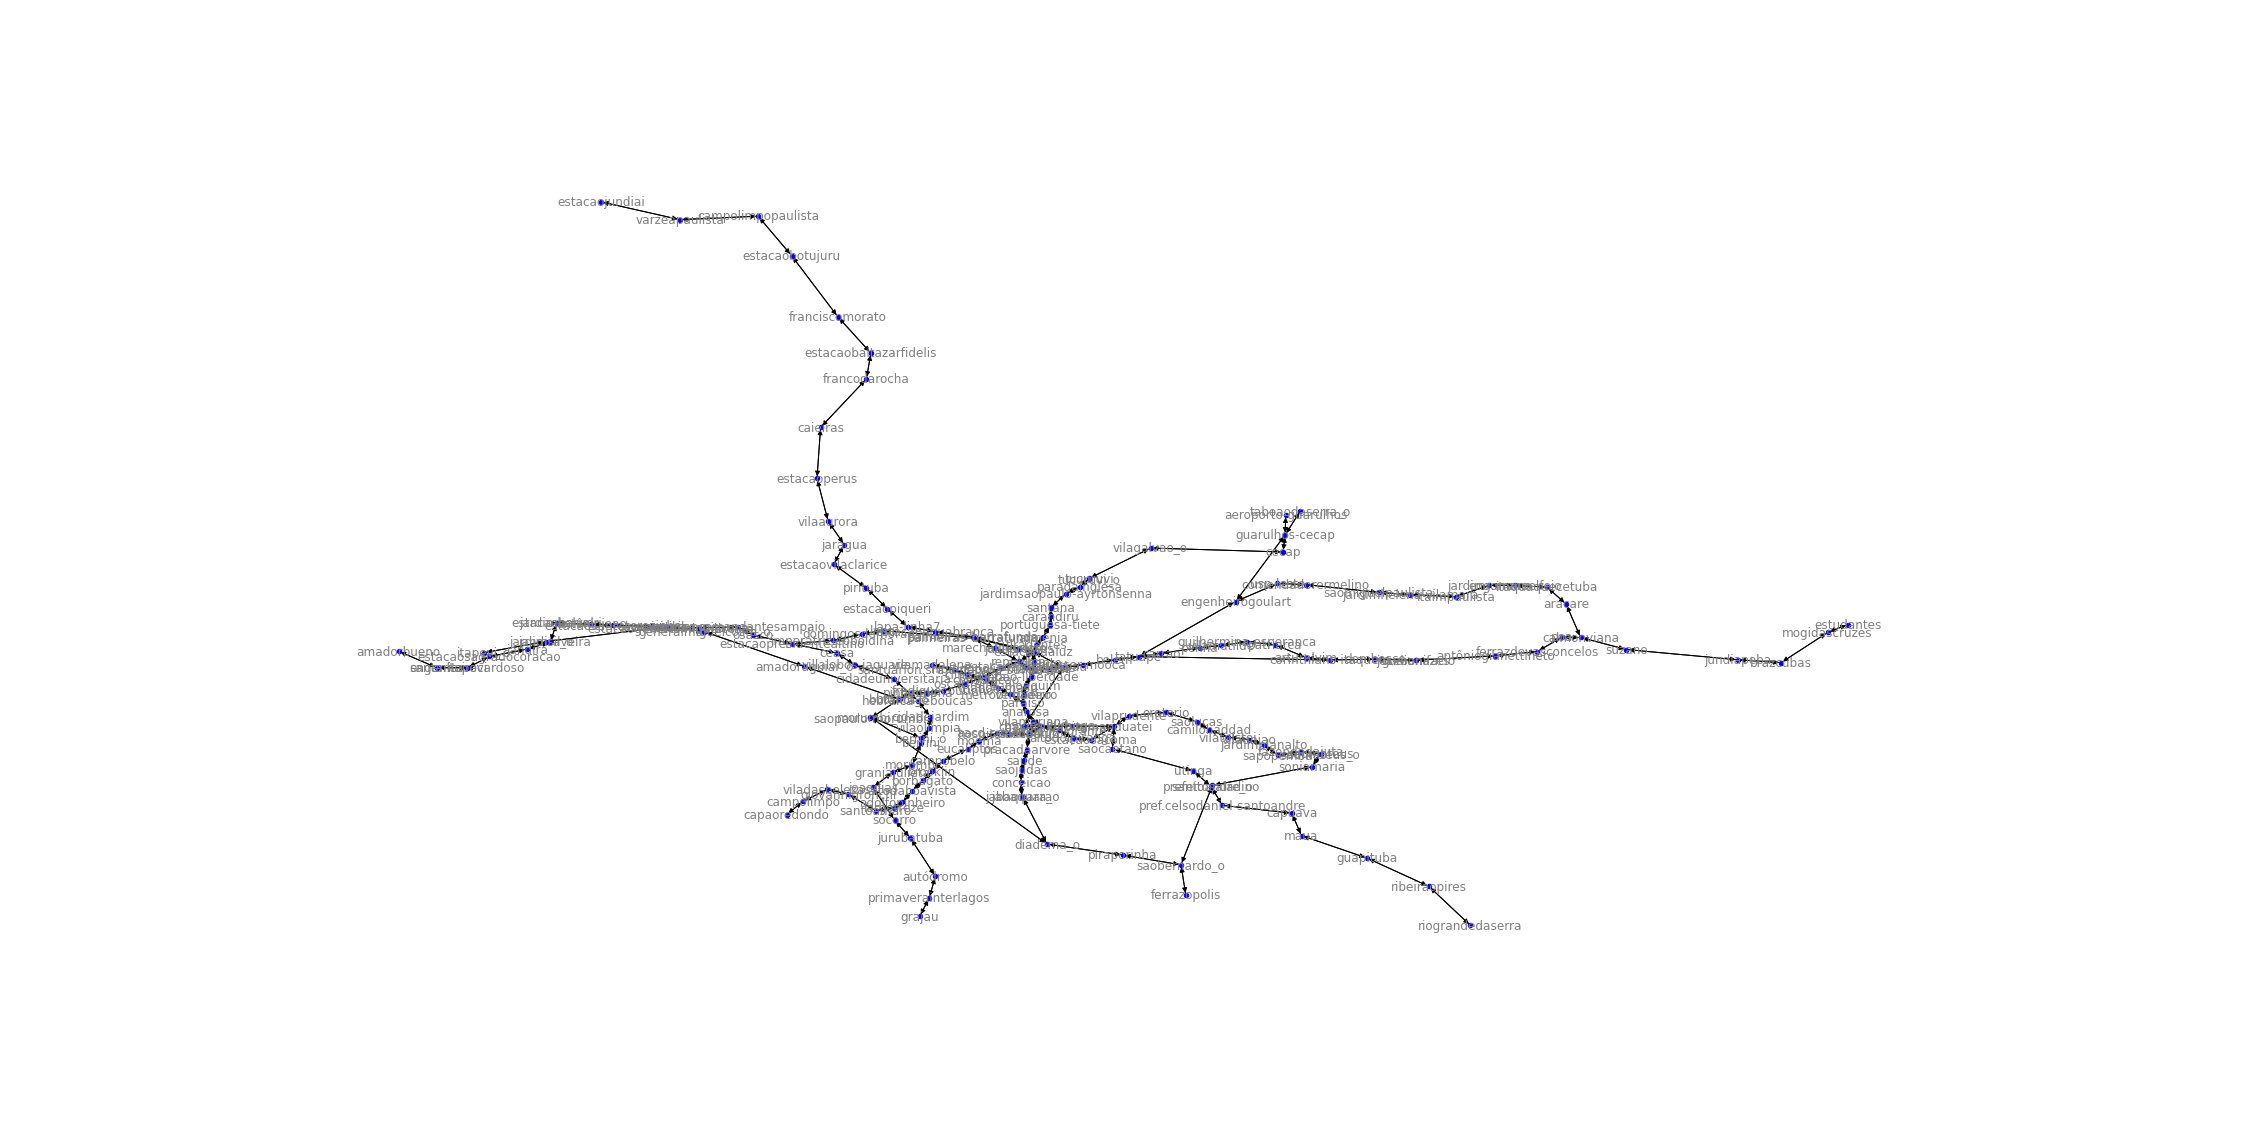

In [10]:
    # pos = dic_grafos_pos[nomeLinha]
    # print(pos)
    # top = nx.bipartite.sets(g)[0]
    # pos = nx.bipartite_layout(g, top)
    #nx.draw_networkx_labels(g, label_pos=, pos=pos, rotation='vertical')
   
    # print(dic_grafos_pos_total)
    nx.draw_networkx(metroSP, pos=dic_grafos_pos_total, node_color='blue', node_size=20, font_color='gray',with_labels=True)
    # Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    
    ax.margins(0.20)
    fig= plt.gcf()
    fig.set_size_inches(40, 20.5)
    plt.axis("off")
    plt.show()

In [11]:
de = "grajau"  # str(input("Digita a estação onde voce está:"))
para = "aeroporto-guarulhos" #str(input("Digita a estação onde voce vai:"))
gg = nx.dijkstra_path(metroSP,de,para,weight='weight')
gg
dfViagem = df[df['estacao'].apply(lambda x: x in gg)]
dfRota = dfViagem.copy(deep=True)

tempo_da_viagem = df['Tempo Medio'].sum()
print(f"de {de} para {para} demora {tempo_da_viagem}")
# print(gg)

dfV = pd.DataFrame(gg, columns=['estacao'])
df_merge = pd.merge(dfV, df, on='estacao')
#df_merge = df_merge.groupby(['estacao']).max()
dflista = df_merge[['estacao','linha']].groupby('estacao',sort=False)['linha'].apply(list).reset_index()
df_merge2 = pd.merge(df_merge,dflista, on='estacao')
dflista




de grajau para aeroporto-guarulhos demora 788


,estacao,linha
0,grajau,[9 - Esmeralda]
1,primaverainterlagos,[9 - Esmeralda]
2,autódromo,[9 - Esmeralda]
3,jurubatuba,[9 - Esmeralda]
4,socorro,[9 - Esmeralda]
5,joaodias,[9 - Esmeralda]
6,granjajulieta,[9 - Esmeralda]
7,morumbi,[9 - Esmeralda]
8,berrini,[9 - Esmeralda]
9,vilaolimpia,[9 - Esmeralda]


continua na linha, não sai na estaçao grajau
continua na linha, não sai na estaçao primaverainterlagos
continua na linha, não sai na estaçao autódromo
continua na linha, não sai na estaçao jurubatuba
continua na linha, não sai na estaçao socorro
continua na linha, não sai na estaçao joaodias
continua na linha, não sai na estaçao granjajulieta
continua na linha, não sai na estaçao morumbi
continua na linha, não sai na estaçao berrini
continua na linha, não sai na estaçao vilaolimpia
continua na linha, não sai na estaçao cidadejardim
continua na linha, não sai na estaçao hebraica-reboucas
continua na linha, não sai na estaçao cidadeuniversitaria
continua na linha, não sai na estaçao villalobos-jaguare
continua na linha, não sai na estaçao ceasa
Faz baldeação em estacaopresidentealtino e sai da linha 9 - Esmeralda 
continua na linha  8 - Cinza
continua na linha, não sai na estaçao imperatrizleopoldina
continua na linha, não sai na estaçao domingosdemoraes
continua na linha, não sai na est

In [12]:
df_merge

,estacao,ordem,Tempo Medio,linha,tipo,lat,long
0,grajau,1,2,9 - Esmeralda,CPTM,-23.736335,-46.696976
1,primaverainterlagos,2,2,9 - Esmeralda,CPTM,-23.722580,-46.691758
2,autódromo,3,2,9 - Esmeralda,CPTM,-23.706088,-46.688363
3,jurubatuba,4,2,9 - Esmeralda,CPTM,-23.677132,-46.702087
4,socorro,5,2,9 - Esmeralda,CPTM,-23.663435,-46.710843
5,joaodias,6,2,9 - Esmeralda,CPTM,-23.638771,-46.722713
6,granjajulieta,7,2,9 - Esmeralda,CPTM,-23.627239,-46.711883
7,morumbi,8,2,9 - Esmeralda,CPTM,-23.621780,-46.701092
8,berrini,9,2,9 - Esmeralda,CPTM,-23.604754,-46.696134
9,vilaolimpia,10,2,9 - Esmeralda,CPTM,-23.593457,-46.691932


In [13]:
px.set_mapbox_access_token(open("datasets/.mapbox_token").read())

In [14]:
start = df_merge.iloc[[0]]
end = df_merge.iloc[[-1]]

In [15]:
df_merge.head(1)

,estacao,ordem,Tempo Medio,linha,tipo,lat,long
0,grajau,1,2,9 - Esmeralda,CPTM,-23.736335,-46.696976


In [16]:
prevEst = start['estacao'].values[0]
prevLinhaEst = start['linha'].values[0]

print(f"Inicia sua viagem na estação {start['estacao'].values[0]}")

for key in range(len(dflista.values.tolist())-1):
    value=dflista.values.tolist()[key]
    oldvalue=dflista.values.tolist()[key-1]
    nextvalue=dflista.values.tolist()[key+1]
   
    if(len(value[1])>1):
        linhaAnterior = "".join(map(str,set(value[1]).intersection(oldvalue[1])))
        linhaPosterior = "".join(map(str,set(value[1]).intersection(nextvalue[1])))
        #se não tem a linha anterior na posterior então vamos mudar de linha
        if(linhaAnterior in linhaPosterior):
            #a estação tem mais linhas mas nos não vamos mudar de linha
            #para proximas consultas vamos setar uma linha só
            if(key not in (1,len(dflista.values.tolist())-1)):
                print(f'continua na linha, não sai na estaçao {value[0]}')
            
            value[1]=[linhaAnterior]
            pass
        elif(linhaAnterior in value[1]):
            if(key not in (1,len(dflista.values.tolist())-1)):
                print(f"Faz baldeação em {value[0]} e sai da linha {linhaAnterior} ")
                print(f'continua na linha  {"".join(nextvalue[1])}')
            #linhas possivel troca
            #print(value[1])
    else:
        if(key not in (1,len(dflista.values.tolist())-1)):
            print(f'continua na linha, não sai na estaçao {value[0]}')
        
print(f"Voce chegou a seu destino desce na estação {end['estacao'].values[0]}")


Inicia sua viagem na estação grajau
continua na linha, não sai na estaçao grajau
continua na linha, não sai na estaçao autódromo
continua na linha, não sai na estaçao jurubatuba
continua na linha, não sai na estaçao socorro
continua na linha, não sai na estaçao joaodias
continua na linha, não sai na estaçao granjajulieta
continua na linha, não sai na estaçao morumbi
continua na linha, não sai na estaçao berrini
continua na linha, não sai na estaçao vilaolimpia
continua na linha, não sai na estaçao cidadejardim
continua na linha, não sai na estaçao hebraica-reboucas
continua na linha, não sai na estaçao cidadeuniversitaria
continua na linha, não sai na estaçao villalobos-jaguare
continua na linha, não sai na estaçao ceasa
Faz baldeação em estacaopresidentealtino e sai da linha 9 - Esmeralda 
continua na linha  8 - Cinza
continua na linha, não sai na estaçao imperatrizleopoldina
continua na linha, não sai na estaçao domingosdemoraes
continua na linha, não sai na estaçao lapa
Faz baldeaçã

https://shakasom.medium.com/routing-street-networks-find-your-way-with-python-9ba498147342

In [17]:
fig = px.scatter_mapbox(dfViagem, lat="lat", lon="long", size_max=100,
                        hover_name="estacao", zoom=11, height=500, mapbox_style="dark")
                        #animation_frame=dfViagem.index,
# fig.data[0].marker = dict(size = 12, color="blue")

# fig.add_trace(px.scatter_mapbox(start, lon= "lat", lat="long").data[0])

# fig.data[1].marker = dict(size = 15, color="red")

# fig.add_trace(px.scatter_mapbox(end, lon= "lat", lat="long").data[0])

# fig.data[2].marker = dict(size = 15, color="green")

fig.add_trace(px.line_mapbox(dfViagem, lon= "lat", lat="long").data[0])

# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()